In [73]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model

In [74]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [75]:
ddf = pd.read_csv('all_faults.csv')

In [76]:
ddf.shape

(3015936, 2)

In [77]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

win_len=1000
stride=200

X=[]
Y=[]


for k in ddf['fault'].unique():
    
    df_temp_2 = ddf[ddf['fault']==k]
    
    for i in np.arange(0,len(df_temp_2)-(win_len),stride):
        temp = df_temp_2.iloc[i:i+win_len,:-1].values
        temp = temp.reshape((1,-1))
        X.append(temp)
        Y.append(df_temp_2.iloc[i+win_len,-1])
    
X=np.array(X)
X=X.reshape((X.shape[0],win_len))



Y=np.array(Y)
encode= LabelEncoder()
encode.fit(Y)
encoded_Y = encode.transform(Y)
OHE_Y = to_categorical(encoded_Y)

In [78]:
np.shape(X)

(15042, 1000)

In [79]:
Y.shape

(15042,)

In [80]:
OHE_Y.shape

(15042, 8)

In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,OHE_Y,test_size=0.2,shuffle=True)

In [82]:
#i=1
#for train_index,test_index in kf.split(X,OHE_Y):
#    print("fold",i)
#   X_train,X_test=X[train_index],X[test_index]
#   y_train,y_test=OHE_Y[train_index],OHE_Y[test_index]
#   print(X_train,"having:",len(X_train))
#   print(X_test,"having:",len(X_test))
#   print("--------------------------")
#   i+=1

In [83]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

(12033, 1000)
(3009, 1000)
(12033, 8)
(3009, 8)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [84]:
n_inputs = X.shape[1]
input_data_shape= Input(shape=(n_inputs,))
encoder= Dense(n_inputs)(input_data_shape)
encoder = BatchNormalization()(encoder)
encoder= ReLU()(encoder)
encoder= Dense(n_inputs/2)(encoder)
encoder= BatchNormalization()(encoder)
encoder= ReLU()(encoder)
encoder= Dense(n_inputs/4)(encoder)
encoder= BatchNormalization()(encoder)
encoder= ReLU()(encoder)
##n_bottleneck = round(float(n_inputs) / 8)
##bottleneck = Dense(n_bottleneck)(encoder)
encoder= Dense(n_inputs/8)(encoder)
encoder= BatchNormalization()(encoder)
encoder= ReLU()(encoder)
bottleneck= encoder
decoder = Dense(n_inputs/4)(encoder)
decoder = BatchNormalization()(decoder)
decoder = ReLU()(decoder)
decoder = Dense(n_inputs/2)(decoder)
decoder = BatchNormalization()(decoder)
decoder = ReLU()(decoder)
decoder = Dense(n_inputs)(decoder)
decoder = BatchNormalization()(decoder)
decoder = ReLU()(decoder)

In [85]:
output = Dense(n_inputs/125, activation='linear')(decoder)
model = Model(inputs=input_data_shape, outputs=output)
model.compile(optimizer='adam', loss='mse')

In [86]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense_36 (Dense)            (None, 1000)              1001000   
                                                                 
 batch_normalization_14 (Bat  (None, 1000)             4000      
 chNormalization)                                                
                                                                 
 re_lu_14 (ReLU)             (None, 1000)              0         
                                                                 
 dense_37 (Dense)            (None, 500)               500500    
                                                                 
 batch_normalization_15 (Bat  (None, 500)              2000      
 chNormalization)                                          

In [87]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2, validation_data=(X_test,y_test))

Epoch 1/50
377/377 - 8s - loss: 0.1871 - val_loss: 0.1095 - 8s/epoch - 21ms/step
Epoch 2/50
377/377 - 6s - loss: 0.0948 - val_loss: 0.1041 - 6s/epoch - 17ms/step
Epoch 3/50
377/377 - 6s - loss: 0.0791 - val_loss: 0.0861 - 6s/epoch - 17ms/step
Epoch 4/50
377/377 - 6s - loss: 0.0639 - val_loss: 0.1198 - 6s/epoch - 17ms/step
Epoch 5/50
377/377 - 7s - loss: 0.0541 - val_loss: 0.1271 - 7s/epoch - 18ms/step
Epoch 6/50
377/377 - 6s - loss: 0.0457 - val_loss: 0.0925 - 6s/epoch - 17ms/step
Epoch 7/50
377/377 - 7s - loss: 0.0401 - val_loss: 0.0852 - 7s/epoch - 17ms/step
Epoch 8/50
377/377 - 6s - loss: 0.0372 - val_loss: 0.1070 - 6s/epoch - 17ms/step
Epoch 9/50
377/377 - 7s - loss: 0.0341 - val_loss: 0.0880 - 7s/epoch - 17ms/step
Epoch 10/50
377/377 - 7s - loss: 0.0308 - val_loss: 0.0762 - 7s/epoch - 18ms/step
Epoch 11/50
377/377 - 7s - loss: 0.0285 - val_loss: 0.0908 - 7s/epoch - 17ms/step
Epoch 12/50
377/377 - 7s - loss: 0.0272 - val_loss: 0.0788 - 7s/epoch - 18ms/step
Epoch 13/50
377/377 - 7s 

In [88]:
encoder = Model(inputs=input_data_shape, outputs=bottleneck)
encoder.save('encoder.h5')

In [89]:
X_train_encode = encoder.predict(X_train)
X_test_encode = encoder.predict(X_test)
##y_train_encode = encoder.predict(y_train)
##y_test_encode = encoder.predict(y_test)
##y_pred=encoder.predict(X_test_encode)
##y_test_=np.argmax(y_test,axis=1)
##y_pred_=np.argmax(y_pred,axis=0)


In [90]:
print(y_train.shape)
print(y_test.shape)


(12033, 8)
(3009, 8)


In [91]:
#X_pre_aen = encoder.predict(X)
#X_t_sne = TSNE(n_components=2, learning_rate='auto',verbose=1, perplexity=40, n_iter=300).fit_transform(X_pre_aen )

In [92]:
#tSNEdf = pd.DataFrame(data = X_t_sne, columns = ['t-SNE component 1', 't-SNE component 2'])
#tSNEdf['Fault']=Y

In [93]:
#fig, ax = plt.subplots(figsize=(7,7))
#sns.scatterplot(x=tSNEdf['t-SNE component 1'],y=tSNEdf['t-SNE component 2'],hue='Fault',
   ## data=tSNEdf,
    ##alpha=0.3)
#plt.show()

In [94]:
print(X_train_encode.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12033, 125)
(3009, 1000)
(12033, 8)
(3009, 8)


In [95]:
X=encoder.predict(X)

In [96]:
#tSNEdf

In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten



no_classes=len(encode.classes_)
model_ANN_AUtoencoder = Sequential()
model_ANN_AUtoencoder.add(Dense(125, input_shape=(X.shape[1],), activation='relu'))
model_ANN_AUtoencoder.add(Dense(250, activation='relu'))
model_ANN_AUtoencoder.add(Dense(500, activation='relu'))
model_ANN_AUtoencoder.add(Dense(750, activation='relu'))
model_ANN_AUtoencoder.add(Dense(no_classes, activation='softmax'))
model_ANN_AUtoencoder.summary()

# compile the model
model_ANN_AUtoencoder.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 125)               15750     
                                                                 
 dense_51 (Dense)            (None, 250)               31500     
                                                                 
 dense_52 (Dense)            (None, 500)               125500    
                                                                 
 dense_53 (Dense)            (None, 750)               375750    
                                                                 
 dense_54 (Dense)            (None, 8)                 6008      
                                                                 
Total params: 554,508
Trainable params: 554,508
Non-trainable params: 0
_________________________________________________________________


In [106]:
history = model_ANN_AUtoencoder.fit(X_train_encode ,
                    y_train,
                    epochs=50, 
                    batch_size=32,
                    shuffle=True,
                    validation_data=(X_test_encode ,y_test),
                    verbose=1)

Epoch 1/50
377/377 [==============================] - 3s 6ms/step - loss: 0.0472 - accuracy: 0.9888 - val_loss: 1.1200 - val_accuracy: 0.8421
Epoch 2/50
377/377 [==============================] - 2s 5ms/step - loss: 0.0080 - accuracy: 0.9982 - val_loss: 1.3162 - val_accuracy: 0.8468
Epoch 3/50
377/377 [==============================] - 2s 5ms/step - loss: 0.0050 - accuracy: 0.9988 - val_loss: 1.4163 - val_accuracy: 0.8368
Epoch 4/50
377/377 [==============================] - 2s 5ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 1.2879 - val_accuracy: 0.8368
Epoch 5/50
377/377 [==============================] - 2s 6ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 1.2848 - val_accuracy: 0.8521
Epoch 6/50
377/377 [==============================] - 2s 6ms/step - loss: 0.0093 - accuracy: 0.9984 - val_loss: 1.9489 - val_accuracy: 0.8485
Epoch 7/50
377/377 [==============================] - 2s 5ms/step - loss: 0.0185 - accuracy: 0.9972 - val_loss: 2.4150 - val_accuracy: 0.8521
Epoch 

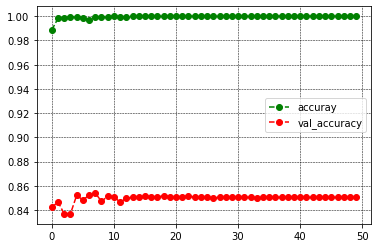

In [107]:
plt.plot(history.history['accuracy'],'go--')
plt.plot(history.history['val_accuracy'],'ro--')
plt.legend(['accuray','val_accuracy'])
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.show()

In [108]:
model_ANN_AUtoencoder.save('model_ANN_AUtoencoder.h5')

In [110]:
y_pred=model_ANN_AUtoencoder.predict(X_test_encode)
print(y_pred)
print(y_pred.shape)

[[1.0000000e+00 3.9832806e-17 5.0170661e-17 ... 4.6626507e-17
  9.2572771e-16 5.4177231e-20]
 [2.0343841e-31 1.2744599e-24 4.4929527e-30 ... 1.0000000e+00
  1.5380975e-29 3.6993724e-14]
 [3.9435271e-08 1.1696309e-08 2.6751459e-09 ... 3.7382026e-08
  1.1572176e-08 4.9967468e-08]
 ...
 [0.0000000e+00 2.3751000e-38 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 1.0633300e-22]
 [1.2062437e-38 0.0000000e+00 1.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [3.3335794e-18 5.2869402e-18 7.4209441e-16 ... 3.0747315e-13
  8.5584009e-19 1.0000000e+00]]
(3009, 8)


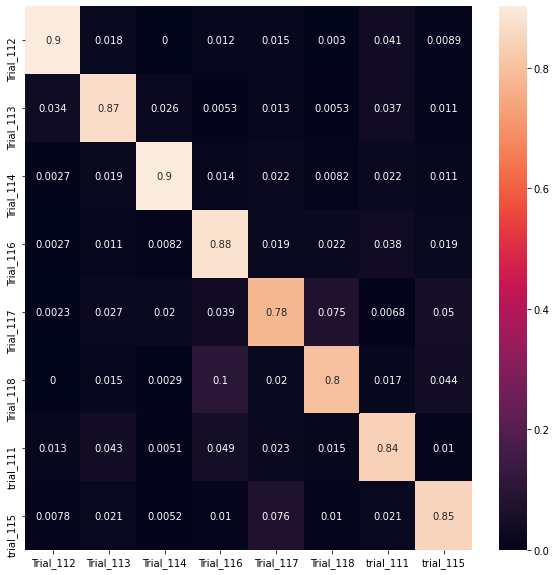

In [111]:
def inv_Transform_result(y_pred):    
    y_pred = y_pred.argmax(axis=1)
    y_pred = encode.inverse_transform(y_pred)
    return y_pred






Y_pred=inv_Transform_result(y_pred)
Y_test = inv_Transform_result(y_test)




from sklearn.metrics import confusion_matrix


plt.figure(figsize=(10,10))
cm = confusion_matrix(Y_test, Y_pred,normalize='true')
f = sns.heatmap(cm, annot=True,xticklabels=encode.classes_,yticklabels=encode.classes_)
plt.show()

In [112]:
print(X_train.shape)
print(X_test.shape)
print(X_train_encode.shape)
print(X_test_encode.shape)
print(y_train.shape)
print(y_test.shape)

(12033, 1000)
(3009, 1000)
(12033, 125)
(3009, 125)
(12033, 8)
(3009, 8)


In [114]:
from tensorflow import keras
import tensorflow as tf
model_ANN_AUtoencoder = keras.models.load_model('model_ANN_AUtoencoder.h5')
# if used same model file, the mappings will remain same
mappings = ['Trial_112', 'Trial_113', 'Trial_114', 'Trial_116', 'Trial_117', 'Trial_118', 'trial_111', 'trial_115']
ddf = pd.read_csv('test.csv')
# taking first 1000 entries from file
x = np.array(ddf['vibrations'][:1000])
x = tf.expand_dims(x, 0)
out1 = encoder.predict(x)
print(out1)
out = model_ANN_AUtoencoder.predict(out1)
print(out)
out = out.flatten()
# print(out)
# print(np.max(out))
res = np.max(out)
temp = np.where(out==res)
# listl = []
# for t in temp :
#     listl.append(t[0])
# print(listl)
print(temp)
print(mappings[temp[0][0]])

[[0.87177646 0.         0.         0.         0.         0.
  0.         0.         0.         0.3309613  0.         0.
  0.         0.         0.         0.         0.         1.2177031
  3.1081731  1.7251976  0.67478883 0.         0.8556824  0.5983655
  0.         0.         0.         0.         0.         0.
  0.20919879 0.         0.         0.         0.         0.
  0.6460053  0.0836193  0.         0.         0.         0.
  0.         1.4852047  0.         0.         0.         0.
  0.         0.         0.26484895 0.         0.         1.2663234
  1.8955503  0.         0.         0.         0.         0.38402954
  1.5084267  0.         0.         0.         0.22485925 1.3426106
  1.2108916  0.         0.         0.27110416 0.         0.41114074
  0.         0.08608699 0.         0.         0.63173616 0.
  0.         0.         0.         0.22660466 0.         0.
  0.         1.4938217  0.         0.         1.7792987  0.8321201
  1.1710945  0.         0.         0.         0. 

In [33]:
dummy_ann = Model(inputs=model.input,outputs=model.layers[-3].output)
y_viz = dummy_ann.predict(X_train_encode)
y_viz.shape

(8870, 750)

In [34]:
def T_SNE_plot(X_train_encode,y_train,model,encode):
    
    dummy_ann = Model(inputs=model.input,outputs=model.layers[-2].output)
    y_viz = dummy_ann.predict(X_train_encode)
    
    from sklearn.manifold import TSNE

    X_t_sne = TSNE(n_components=2, learning_rate='auto',verbose=1, perplexity=40, n_iter=300).fit_transform(y_viz)

    tSNEdf = pd.DataFrame(data = X_t_sne, columns = ['T-SNE component 1', 'T-SNE component 2'])

    tSNEdf['Fault']=inv_Transform_result(y_train)


    # Plot the PC-1 and PC-2
    fig, ax = plt.subplots(figsize=(10,10))
    sns.scatterplot(x=tSNEdf['T-SNE component 1'],y=tSNEdf['T-SNE component 2'],hue='Fault',
        data=tSNEdf,
        legend="full",
        alpha=0.3)
    plt.show()

C:\Users\abulf\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8870 samples in 0.000s...
[t-SNE] Computed neighbors for 8870 samples in 2.566s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8870
[t-SNE] Computed conditional probabilities for sample 2000 / 8870
[t-SNE] Computed conditional probabilities for sample 3000 / 8870
[t-SNE] Computed conditional probabilities for sample 4000 / 8870
[t-SNE] Computed conditional probabilities for sample 5000 / 8870
[t-SNE] Computed conditional probabilities for sample 6000 / 8870
[t-SNE] Computed conditional probabilities for sample 7000 / 8870
[t-SNE] Computed conditional probabilities for sample 8000 / 8870
[t-SNE] Computed conditional probabilities for sample 8870 / 8870
[t-SNE] Mean sigma: 1.811052
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.020348
[t-SNE] KL divergence after 300 iterations: 2.267351


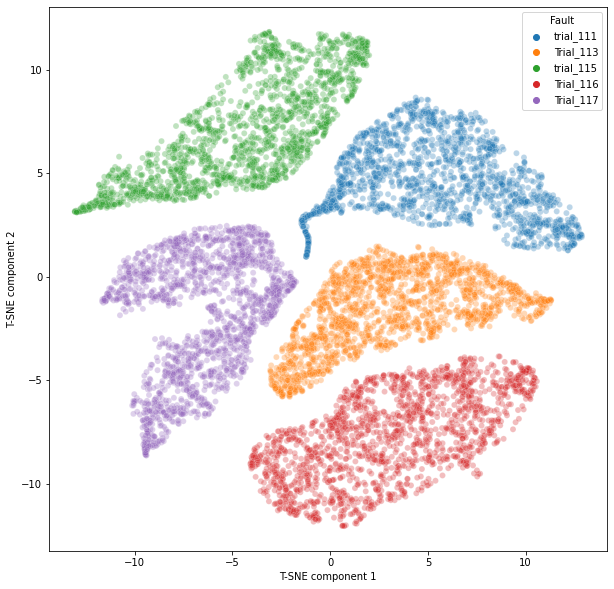

In [35]:
T_SNE_plot(X_train_encode,y_train,model,encode)

In [36]:

y_test_class=np.argmax(y_test,axis=1)
y_pred_class=np.argmax(y_pred,axis=1)

In [37]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       188
           1       0.82      0.86      0.84       219
           2       0.85      0.84      0.84       184
           3       0.86      0.83      0.84       187
           4       0.89      0.85      0.87       207

    accuracy                           0.85       985
   macro avg       0.85      0.85      0.85       985
weighted avg       0.85      0.85      0.85       985

